In [74]:
import pandas as pd
from matplotlib import pyplot as plt
from rdfrun import *
from benchmark_queries import *
import time
%matplotlib inline
PREFIX = 'ciee_'

In [109]:
def overlap_hist(df):
    plt.clf()
    bins = pd.np.linspace(0, df.max().max(), 100)
    for col in df.columns:
        plt.hist(df[col], alpha=0.5, label=col)
    plt.legend(loc='upper right')
    plt.show()
def overlap_cdf(df,title=''):
    plt.clf()
    plt.figure()
    for col in df.columns:
        #plt.hist(df[col], alpha=0.5, label=col)
        ax = df[col].hist(cumulative=True, normed=1, bins=100, histtype='step',label=col)
        #x.set_label(col)
    plt.legend(loc='lower right')
    ax.get_figure().set_dpi(200)
    plt.xlabel("Latency (ms)")
    plt.ylabel("Proportion")
    plt.title(title)
def boxplot(df,title=''):
    df[df < df.max()].boxplot()
def get_summary(df):
    s = pd.DataFrame({
        'mean': df.mean(),
        'std': df.std(),
        '.99': df.quantile(.99),
        'max': df.max()
    })
    s = s[['mean','std','.99','max']]
    s = s.reindex(["fuseki","allegro","blaze","rdflib","rdf3x","hod"])
    entries = []
    for r in s.values:
        entries.append('/'.join(['{0:0.2f}'.format(x) for x in r]))
    print(' & '.join(entries))
    return s

In [110]:
vavdf = pd.read_csv(PREFIX+'vavenum.csv')

In [111]:
get_summary(vavdf)

10.12/6.80/24.27/96.12 & 10.12/7.72/22.31/113.97 & 20.76/14.44/32.23/220.70 & 10.86/2.06/17.89/20.46 & 6.39/1.53/12.38/15.82 & 4.42/1.45/9.07/16.39


,mean,std,.99,max
fuseki,10.124944,6.796153,24.274646,96.120850
allegro,10.121616,7.717250,22.313516,113.968018
blaze,20.757927,14.439572,32.229321,220.698486
rdflib,10.862720,2.063889,17.894836,20.464355
rdf3x,6.392549,1.533679,12.380718,15.822021
hod,4.417139,1.450324,9.074836,16.387451


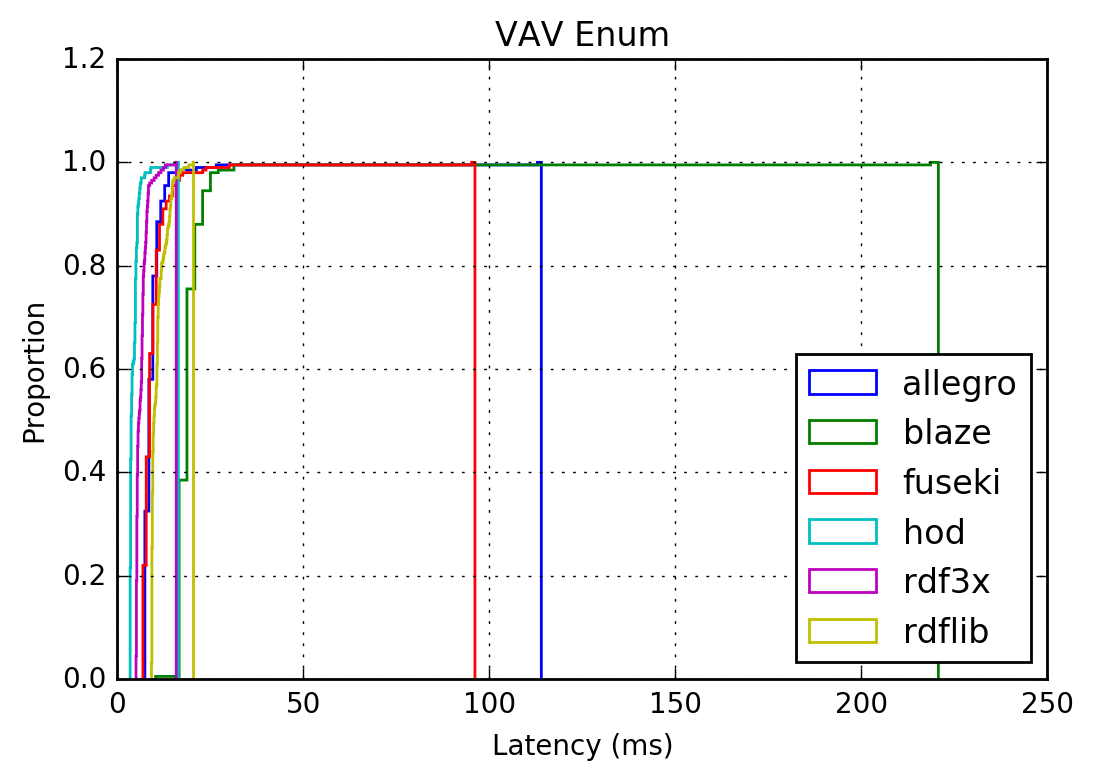

In [78]:
fig = overlap_cdf(vavdf,"VAV Enum")

In [79]:
tempsensedf = pd.read_csv(PREFIX+'tempsense.csv')

In [112]:
get_summary(tempsensedf)

11.49/11.08/30.83/156.59 & 45.03/11.87/71.34/182.74 & 30.91/15.50/40.50/244.56 & 11.66/2.35/20.68/23.09 & 6.53/1.64/14.47/15.92 & 4.73/1.04/7.84/10.77


,mean,std,.99,max
fuseki,11.488354,11.076967,30.832939,156.592773
allegro,45.028634,11.870514,71.341611,182.740723
blaze,30.914608,15.501441,40.499468,244.558105
rdflib,11.656914,2.351745,20.676165,23.091553
rdf3x,6.530601,1.642115,14.468533,15.918457
hod,4.732251,1.037816,7.838728,10.773926


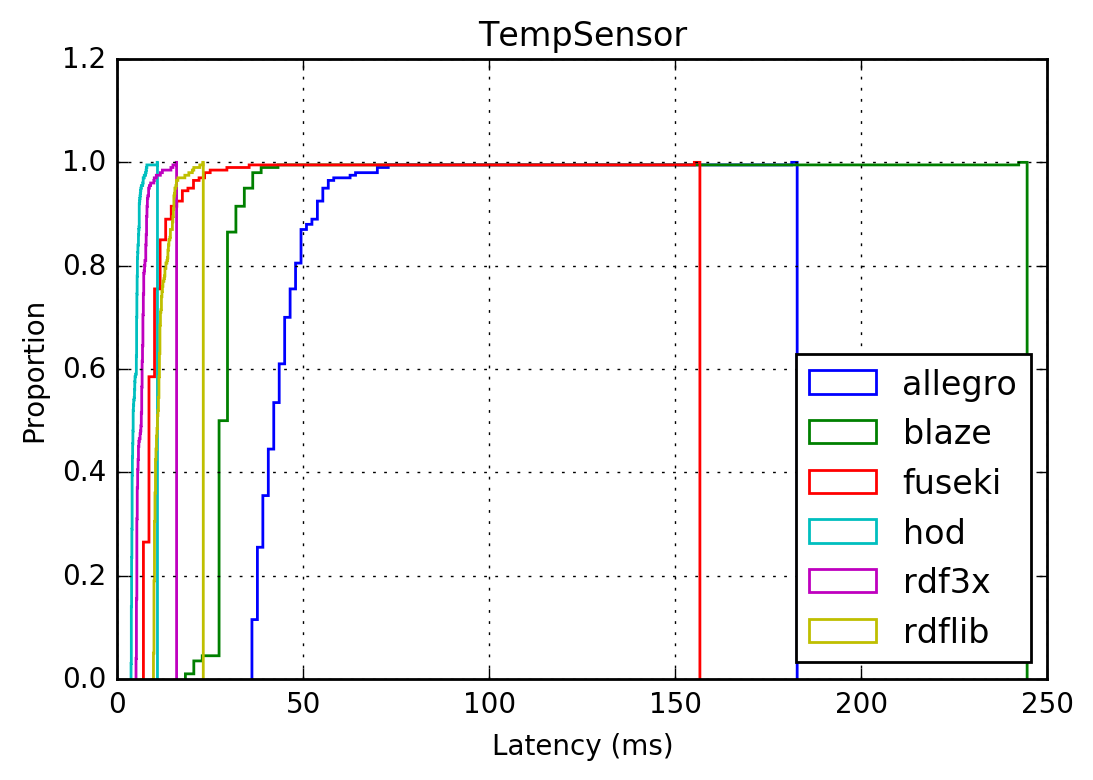

In [81]:
fig = overlap_cdf(tempsensedf,"TempSensor")

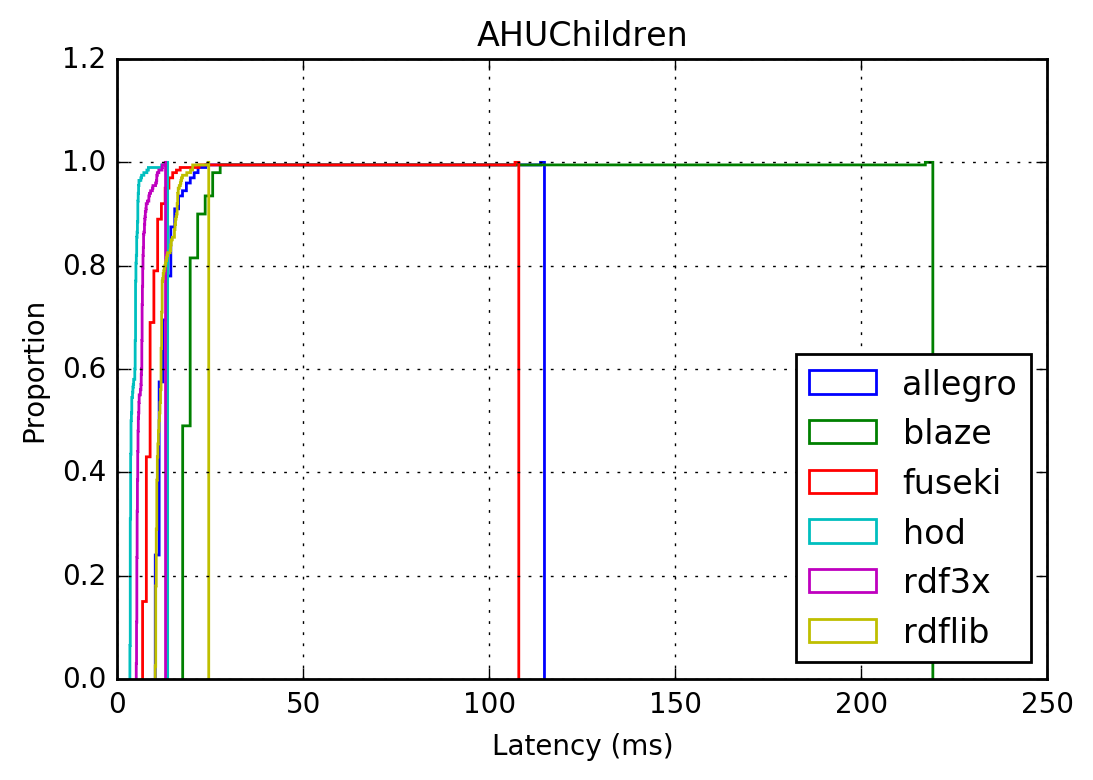

In [82]:
ahuchildren = pd.read_csv(PREFIX+'ahuchildren.csv')
overlap_cdf(ahuchildren,"AHUChildren")

In [113]:
get_summary(ahuchildren)

10.03/7.26/17.17/107.91 & 13.39/7.64/21.75/114.81 & 21.27/14.26/28.03/219.21 & 12.10/2.33/20.25/24.56 & 6.31/1.41/12.03/12.95 & 4.39/1.24/8.47/13.51


,mean,std,.99,max
fuseki,10.026863,7.264449,17.165798,107.906250
allegro,13.388004,7.637216,21.750872,114.810791
blaze,21.268862,14.256471,28.026733,219.211670
rdflib,12.101781,2.329460,20.245632,24.558350
rdf3x,6.313047,1.414644,12.029150,12.949463
hod,4.387819,1.244160,8.467949,13.514404


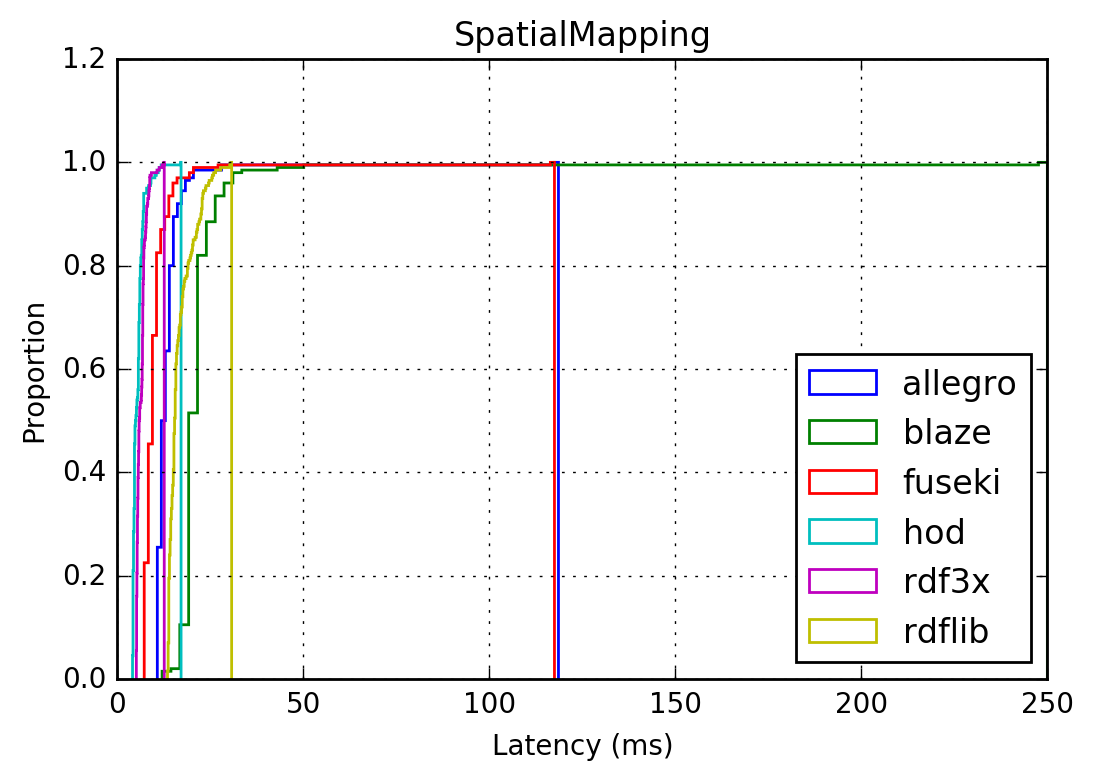

In [84]:
spatialmapping = pd.read_csv(PREFIX+"spatialmapping.csv")
overlap_cdf(spatialmapping, "SpatialMapping")

In [114]:
get_summary(spatialmapping)

10.78/8.08/21.17/117.50 & 14.06/7.88/28.36/118.57 & 23.39/16.63/44.27/249.99 & 16.76/3.47/27.88/30.71 & 6.38/1.26/11.29/12.60 & 5.53/1.62/11.34/17.12


,mean,std,.99,max
fuseki,10.780099,8.082768,21.168816,117.495117
allegro,14.055857,7.875258,28.362039,118.571533
blaze,23.391124,16.626242,44.273337,249.992676
rdflib,16.763300,3.474793,27.877200,30.714355
rdf3x,6.381415,1.260874,11.290667,12.599609
hod,5.530332,1.623141,11.338286,17.121582


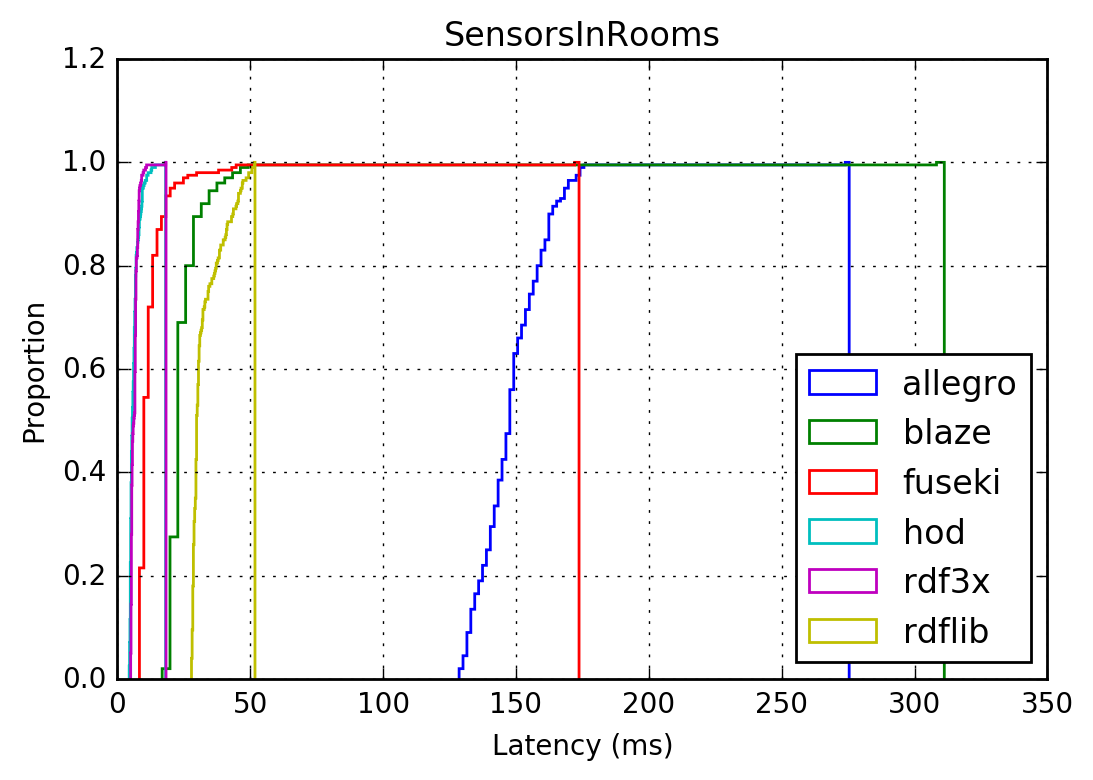

In [86]:
sensorsinrooms = pd.read_csv(PREFIX+"sensorsinrooms.csv")
overlap_cdf(sensorsinrooms, "SensorsInRooms")

In [115]:
get_summary(sensorsinrooms)

13.57/12.51/43.98/173.75 & 149.22/14.51/175.52/275.41 & 27.11/20.88/47.97/311.21 & 32.86/6.06/50.73/51.79 & 6.46/1.45/10.66/18.31 & 6.30/1.91/12.99/18.15


,mean,std,.99,max
fuseki,13.571261,12.509590,43.975986,173.747803
allegro,149.218444,14.510977,175.521111,275.411865
blaze,27.107875,20.877718,47.970195,311.211426
rdflib,32.863729,6.061517,50.733740,51.790039
rdf3x,6.464425,1.452506,10.656721,18.310791
hod,6.301051,1.909793,12.991226,18.150879


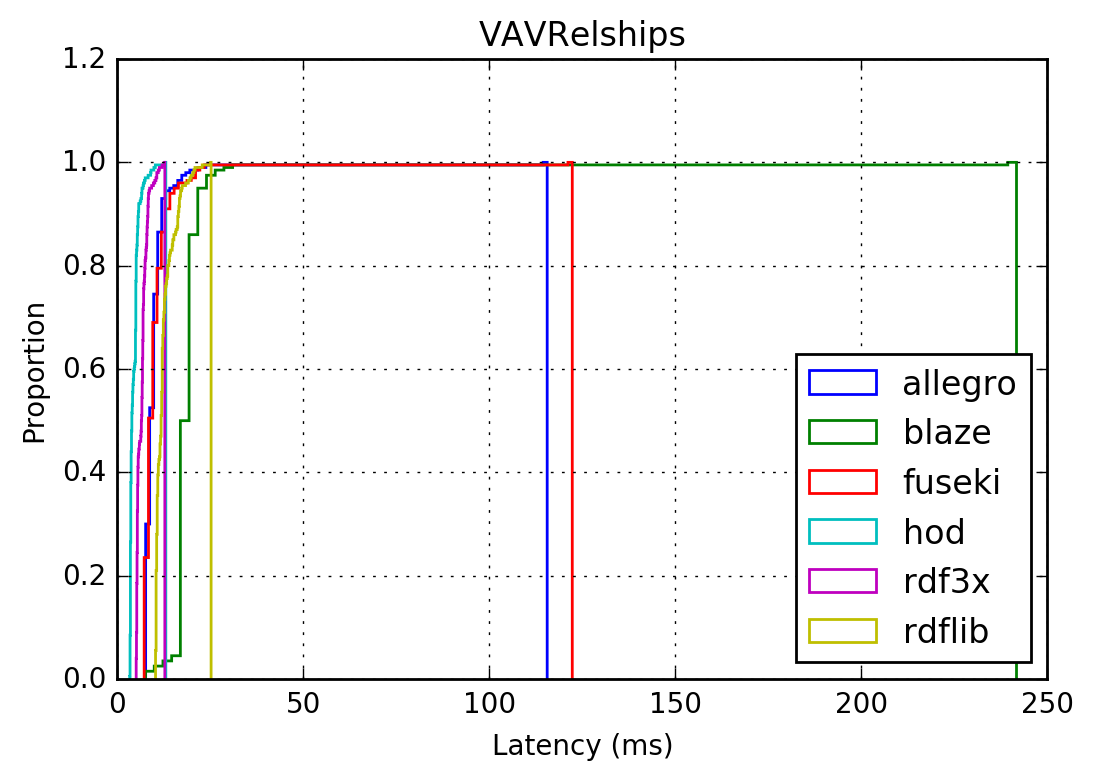

In [88]:
vavrelships = pd.read_csv(PREFIX+"vavrelships.csv")
overlap_cdf(vavrelships, "VAVRelships")

In [116]:
get_summary(vavrelships)

10.90/8.46/23.05/122.28 & 10.61/7.85/22.12/115.54 & 20.53/15.97/30.16/241.70 & 12.51/2.61/20.99/25.20 & 6.55/1.42/11.32/12.76 & 4.51/1.34/9.89/13.02


,mean,std,.99,max
fuseki,10.896486,8.459598,23.054507,122.284180
allegro,10.606805,7.850633,22.122617,115.541016
blaze,20.534636,15.969824,30.157017,241.700439
rdflib,12.509125,2.607264,20.986250,25.195068
rdf3x,6.548075,1.423541,11.317324,12.755615
hod,4.512902,1.343644,9.887393,13.021973


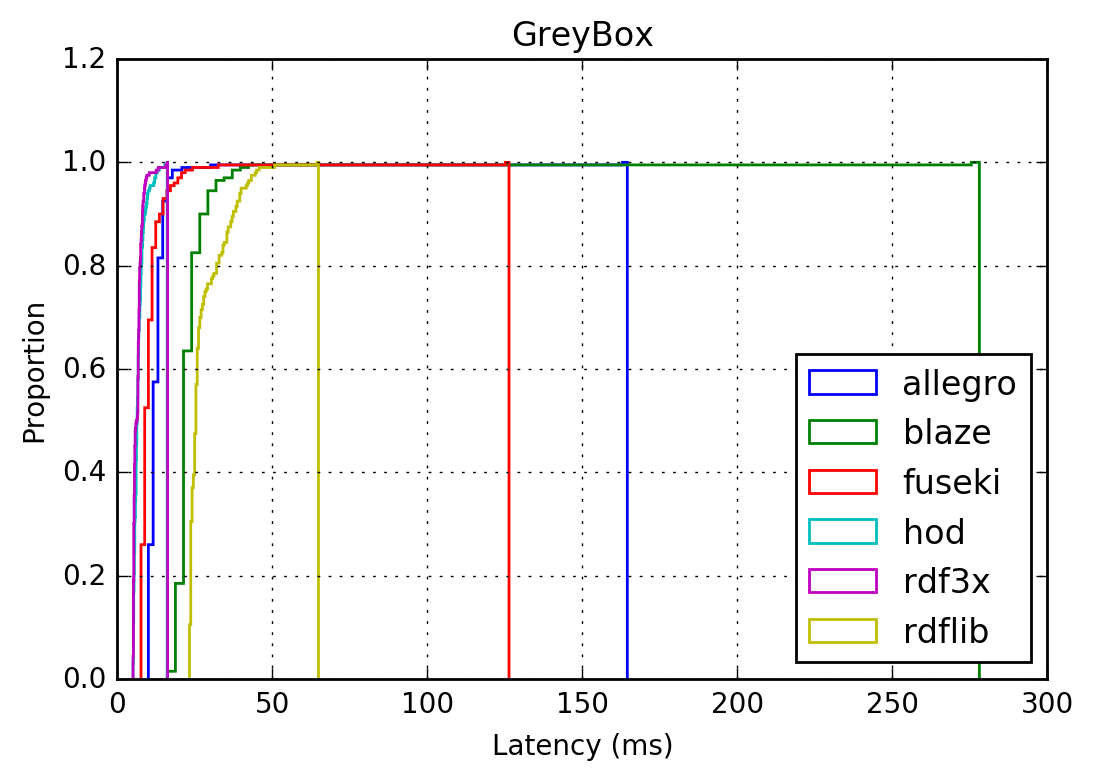

In [90]:
greybox = pd.read_csv(PREFIX+"greybox.csv")
overlap_cdf(greybox, "GreyBox")

In [117]:
get_summary(greybox)

11.40/8.81/25.22/126.34 & 13.68/10.97/21.55/164.50 & 25.38/18.41/41.48/278.07 & 28.01/6.32/46.01/64.87 & 6.54/1.62/13.28/16.20 & 6.90/1.85/13.57/16.07


,mean,std,.99,max
fuseki,11.395829,8.813276,25.223350,126.336914
allegro,13.683998,10.973794,21.548164,164.498535
blaze,25.384861,18.411778,41.478667,278.068359
rdflib,28.005112,6.315342,46.005361,64.866943
rdf3x,6.537815,1.618089,13.278032,16.202637
hod,6.897974,1.846978,13.570405,16.071777
